# Regression Linear Model III: Lasso 

In this notebook we study the Lasso regularization for linear model for regression. We will follow closely the other notebooks where we study linear models and therefore we will start with the theoretical background giving the details of how it works in theory. Again, we will use the notation we already set in the introductionary file for Supervised Learning (Supervised_Learning.ipynb). This notebook is structured as follows

- [Theoretical Analysis:](#s1)
    - [Algorithm](#s1.1)
- [Implementation in `sklearn`](#s2)
- [Mini-challenge](#s3)

<a id='s1'></a>
## Theoretical Analysis

Lasso linear regression is a regularization method for OLS linear regression. There are basically two main reasons why we are often not satisfied with the OLS estimates: 

- The first is _prediction accuracy_: the least squares estimates often have low bias but large variance. Prediction accuracy can sometimes be improved by shrinking or setting some coefficients to zero. By doing so we sacrifice a little bit of bias to reduce the variance of the predicted values, and hence may improve the overall prediction accuracy

- The second reason is _interpretation_. With a large number of predictors, we often would like to determine a smaller subset that exhibit the strongest effects. In order to get the “big picture,” we are willing to sacrifice some of the small details


The regularization methods get into the game in general when our OLS model is too complex for modelising the real dataset. That it means, for example, that among all the features we have, some of them suffers from multi-collinearity. In general, in more mathematical terms, regularization method are used when $d>N$ that makes the matrix $X^TX$ not invertible.




Similarly to the case of the OLS linear model we have to minimize a risk function such that our predicted model will be

$\quad$

<center>
\begin{align}
\mathcal{R}(f)=E\left[L(f(X),Y)\right]=\int L(f(X),Y)dP(X,Y)
\end{align}
</center>

where $L(f(X),Y)$ is the  loss function and $P(X,Y)$ is the joint probability distribution.  The ultimate goal of a learning algorithm is to find a function $\hat{f}$ for which the risk $\mathcal{R}(\hat{f})$ is minimal, among the fixed class of function $\mathcal{H}$:

$\quad$

<center>
\begin{align}
\hat{f}=\arg\min_{f\in\mathcal{H}} \mathcal{R}(f)
\end{align}
</center>

Since the statistician cannot compute the expectation (and thus the risk) because he does not know the distribution $P(x,y)$, it's common to replace the risk with an estimatore of the risk, called the empirical risk:

$\quad$

<center>
\begin{align}
\hat{\mathcal{R}}(f)=\frac{1}{N}\sum_{i=1}^NL(f(x_i),y_i)
\end{align}
</center>

where $x_i$ is the row vector if the $i$-th observation and $y_i$ the output variable of the associated input row. We seek for a function:

$\quad$

<center>
\begin{align}
\hat{f}=\arg\min_{f\in\mathcal{H}} \hat{\mathcal{R}}(f)
\end{align}
</center>

<a id='s1.1'></a>
### Algorithm

The algorithm of Lasso linear regression work by modifying the risk function bby adding penalty terms which play the role of a Lagrangian multiplier and turning the problem of minimizing the undeformed risk function to the problem of  minimize a functional subject to a constraint. With this criterion the coefficient of the linear model are not treated on same level but some of them are shrinked near to zero. 

The linear function describing the dataset is still linear

\begin{align}
f(x_i)=\theta_0+\sum_{j=0}^px_{ij}\theta_j=\theta\cdot X=f(X)
\end{align}

where we show either the component and the compact for of the expression. The OLS risk function is modify as

\begin{align}
\hat{\mathcal{R}}(\theta)=\sum_{i=1}^N(y_i-\theta_0-\sum_{j=1}^px_{ij}\theta_j)^2+\lambda\sum_{j=0}^p\theta_j^2=||Y-f(X)||^2 +\lambda\,\sqrt{\theta^T\theta}=||Y-f(X)||^2 +\lambda\,||\theta||
\end{align}

Therefore the predicted model will give the following coefficient

\begin{align}
\hat{\theta}=\arg\min_{\theta}\left\{||Y-f(X)||^2 +\lambda\,||\theta||\right\}
\end{align}

Or, in an equivalent way we can write the ridge problem as the minimizing constraint problem

\begin{align}
\hat{\theta}&=\arg\min_{\theta}\left\{||Y-f(X)||^2\right\}\\
||\theta||&\le t(\lambda)
\end{align}

where $t(\lambda)$ is a paramters in one-to-one correpondence with $\lambda>0$, which is the complexity parameter that controls the amount of shrinking: the larger the value of $\lambda$, the greater the amount of shrinkage.

When there are many correlated variables in a linear regression model, their coefficients can become poorly determined and exhibit high variance. A wildly large positive coefficient on one variable can be canceled by a similarly large negative coefficient on its correlated cousin. By imposing a size constraint on the coefficients this problem is alleviated.

The solution to the constraint problem is not analytic amnymore as in the OLS and Ridge models.

Because of the nature of the constraint, making t sufficiently small will
cause some of the coefficients to be exactly zero.

<div>
<img width=600 src='images/lasso.png' /> 
</div>

The picture simply shows the what a constraint minimizing problem works: the minimial of entire deformed function is where the level curves of the two functions are tangent each other, or, equivalently, the two gradient vectors are parallel each other. The meaning and amount of shrinkage will be more clear after the next section.

<a id='s2'></a>
## Implementation in `sklearn`

The class `Lasso` of the module `sklearn.linear_model` is:

`sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)`

Since it's a class is composed by __parameters__, __attributes__ and __method__. We list here them with a biref explanation

### Parameters

- `alpha`: {float, ndarray of shape (n_targets,)}, default=1.0
 
    Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates.

- `fit_intercept`: bool, optional, default True

    Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations  
    

- `normalize`: bool, optional, default False
    
    This parameter is ignored when `fit_intercept` is set to False. If True, the regressors $X$ will be normalized before regression by subtracting the mean and dividing by the norm.

- `precompute`: True | False | array-like, default=False

   Whether to use a precomputed Gram matrix to speed up calculations. If set to 'auto' let us decide. 

- `copy_X`: bool, optional, default True
    
    If True, $X$ will be copied; else, it may be overwritten.

- `max_iter`: int, default=None
    
    Maximum number of iterations for conjugate gradient solver. For ‘sparse_cg’ and ‘lsqr’ solvers, the default value is determined by scipy.sparse.linalg. For ‘sag’ solver, the default value is 1000.

- `tol`: float, default=1e-3
    Precision of the solution.

- `warm_start` : bool, optional

   When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.

- `positive`: bool, optional

   When set to True, forces the coefficients to be positive.

- `random_state`: int, RandomState instance or None, optional, default None

   The seed of the pseudo random number generator that selects a random feature to update. 

- `selection`: str, default ‘cyclic’

   If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. 

### Attributes

- `coef_`: ndarray of shape (n_features,) or (n_targets, n_features)

    Weight vector(s).

- `sparse_coef_`: scipy.sparse matrix, shape (n_features, 1) | (n_targets, n_features)

   sparse representation of the fitted coef_

- `intercept_`: float or array of shape of (n_targets,)

    Independent term in the linear model. Set to 0.0 if `fit_intercept` = False.

- `n_iter_`: None or ndarray of shape (n_targets,)
    
    Actual number of iterations for each target. Available only for sag and lsqr solvers. Other solvers will return None.

### Methods

- `fit(self, X, y[, sample_weight])`: 	Fit linear model

- `get_params(self[, deep])`: Get parameters for this estimator

- `predict(self, X)`: Predict using the linear model

- `score(self, X, y[, sample_weight])`: Return the coefficient of determination $R^2$ of the prediction

- `set_params(self, \*\*params)`: Set the parameters of this estimator

<a id='s3'></a>
## Mini-challenge

We study here a very simple case of study in a standard data science problem. It will be a very simplify version useful to show how `LinearRegression` work in a real world. With simplify version we mean we will use a common dataframe, aleady clean and adapt to a linear model. In any case we will give a structure of a real challenge even if every section will be extremely reduced in size. We will use the dataset containing the house price in Boston, already contained in `sklearn`. We will have:

- __Inizialization__
- __Exploration of Data__
- __Modelization__

    - Optimisation
    - Stability
    - Interpretability

### Inizialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso

from pdpbox import pdp, info_plots
from sklearn.utils.random import sample_without_replacement

import warnings
warnings.filterwarnings("ignore")

### Exploration of Data

In [2]:
house_price = load_boston()
house_price.data = preprocessing.scale(house_price.data)
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [3]:
df.shape

(506, 14)

### Train the Model

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('PRICE',axis=1), df.PRICE, test_size=0.3, random_state=10)

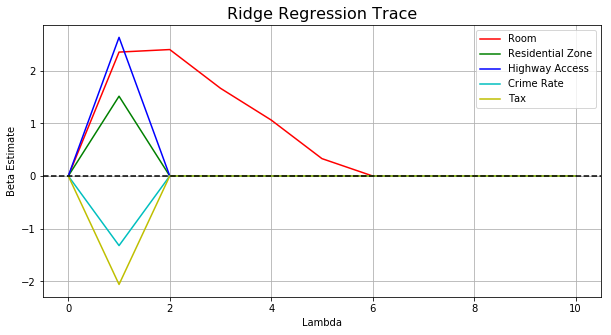

In [8]:
lasso_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': 0})
lasso_train_pred = []
lasso_test_pred = []

alphas = np.arange(0, 10, 1)

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    lasso_df[str(alpha)] = lasso_reg.coef_
    
    lasso_train_pred.append(lasso_reg.predict(X_train))
    lasso_test_pred.append(lasso_reg.predict(X_test))
    
lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate').rename_axis(None).reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lasso_df.RM, 'r', lasso_df.ZN, 'g', lasso_df.RAD, 'b', lasso_df.CRIM, 'c', lasso_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)

In [12]:
# initialize
lasso_reg = Lasso(alpha=0)
lasso_reg.fit(X_train, y_train)
lasso_df = pd.DataFrame({'variable': house_price.feature_names})

alphas = np.arange(0, 10, 1)

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    lasso_df['a='+str(alpha)] = lasso_reg.coef_
lasso_df.set_index('variable',inplace=True)
lasso_df

,a=0,a=1,a=2,a=3,a=4,a=5,a=6,a=7,a=8,a=9
variable,,,,,,,,,,
CRIM,-1.321404,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0
ZN,1.514832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
INDUS,-0.166266,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0
CHAS,0.411579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
NOX,-1.771168,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0
RM,2.352821,2.400912,1.665467,1.061939,0.329770,0.000000,0.000000,0.0,0.0,0.0
AGE,0.318499,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0
DIS,-3.256645,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
RAD,2.632576,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0


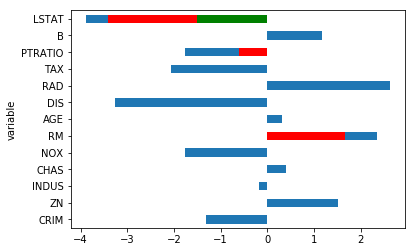

In [13]:
lasso_df['a=0'].plot.barh()
lasso_df['a=2'].plot.barh(color='r')
lasso_df['a=5'].plot.barh(color='g')

### Cross-Validation

#### Holdout

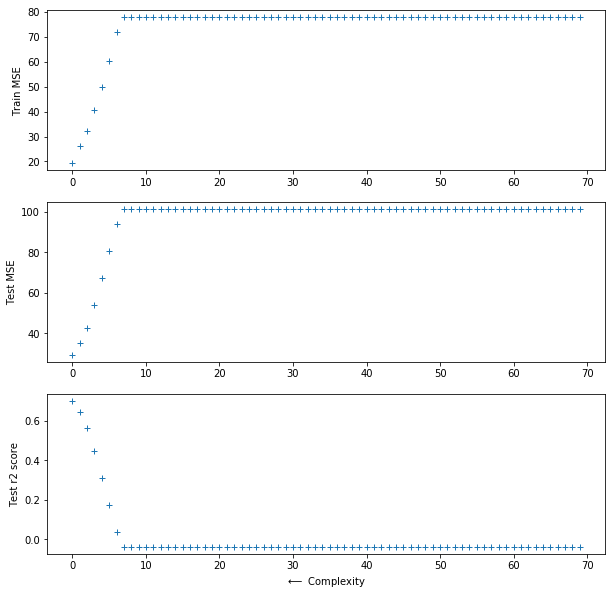

In [21]:
MSE_train=[]
MSE_test=[]
r2=[]
complexity=[]

for a in range(0,100,1):
    model=Lasso(alpha=a)
    model.fit(X_train,y_train)
    MSE_test.append(mean_squared_error(y_test, model.predict(X_test)))
    MSE_train.append(mean_squared_error(y_train, model.predict(X_train)))
    r2.append(r2_score(y_test, model.predict(X_test)))
    complexity.append(a)

fig, axs = plt.subplots(3,1,sharey=False,sharex=False,figsize=(10,10))


axs[2].set_xlabel("$\longleftarrow $ Complexity")

axs[0].set_ylabel('Train MSE')
axs[1].set_ylabel('Test MSE')
axs[2].set_ylabel('Test r2 score')

axs[0].plot(complexity[:70], MSE_train[:70], '+')
axs[1].plot(complexity[:70], MSE_test[:70],  '+')
axs[2].plot(complexity[:70], r2[:70],  '+')


#### Stability

In [17]:
def r2_a(a,rep):
    rkf= RepeatedKFold(n_splits=3, n_repeats=rep, random_state=None)
    r2=[]
    for train_I, test_I in rkf.split(df):
        X_fold_train = df.iloc[train_I, :].drop('PRICE',axis=1)
        y_fold_train = df['PRICE'].values[train_I]
        X_fold_test = df.iloc[test_I, :].drop('PRICE',axis=1)
        y_fold_test = df['PRICE'].values[test_I]
        model = Lasso(alpha=a)
        model.fit(X_fold_train, y_fold_train)
        r2.append(r2_score(y_fold_test, model.predict(X_fold_test)))
    print('The estimation of the r2 score over the training distributions is:', np.mean(r2),'\u00B1', np.std(r2))
    
    return r2

In [18]:
def MSE_a(a,rep):
    rkf= RepeatedKFold(n_splits=3, n_repeats=rep, random_state=None)
    MSE=[]
    for train_I, test_I in rkf.split(df):
        X_fold_train = df.iloc[train_I, :].drop('PRICE',axis=1)
        y_fold_train = df['PRICE'].values[train_I]
        X_fold_test = df.iloc[test_I, :].drop('PRICE',axis=1)
        y_fold_test = df['PRICE'].values[test_I]
        model = Lasso(alpha=a)
        model.fit(X_fold_train, y_fold_train)
        MSE.append(mean_squared_error(y_fold_test, model.predict(X_fold_test)))
    print('The estimation of the MSE over the training distributions is:', np.mean(MSE),'\u00B1', np.std(MSE))
    
    return MSE

The estimation of the MSE over the training distributions is: 29.653775822562665 $±$ 5.119938984674635
The estimation of the MSE over the training distributions is: 62.80945285768592 $±$ 11.099325571654687


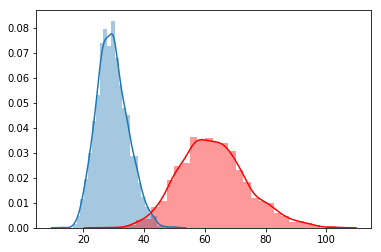

In [16]:
sns.distplot(MSE_a(1,1000),bins=30)
sns.distplot(MSE_a(5,1000),bins=30, color='r')

The estimation of the r2 score over the training distributions is: 0.6473459737402313 ± 0.04157591786745678
The estimation of the r2 score over the training distributions is: 0.2581071475304727 ± 0.0445736000338036


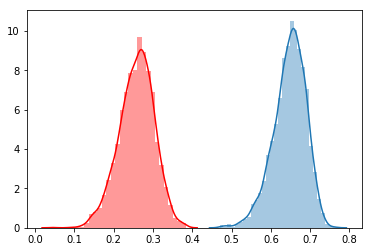

In [19]:
sns.distplot(r2_a(1,1000),bins=30)
sns.distplot(r2_a(5,1000),bins=30, color='r')